<a href="https://colab.research.google.com/github/AndreaHernandez5072/CienciaDatos/blob/main/HousePriceEstimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("train.csv")
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [41]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000
mean,10834.771433,5.399958e+05,3.368243,2.113385,2079.628055,1.510525e+04,1.494666,0.007294,7.659844,1786.855207,292.772849,1970.971586,85.514398,98078.080344,47.560525,-122.214107,1985.357629,12712.953024
std,6237.186244,3.646536e+05,0.934019,0.769465,917.994443,4.215087e+04,0.540669,0.085096,1.177113,828.180612,442.699016,29.383190,404.236968,53.407807,0.138310,0.140878,685.955695,27257.274694
min,0.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,460.000000,651.000000
25%,5434.000000,3.223000e+05,3.000000,1.500000,1420.000000,5.037500e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472400,-122.329000,1480.000000,5100.000000
50%,10875.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.614000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.231000,1830.000000,7620.000000
75%,16222.500000,6.450000e+05,4.000000,2.500000,2550.000000,1.065350e+04,2.000000,0.000000,8.000000,2210.000000,570.000000,1997.000000,0.000000,98118.000000,47.678300,-122.124000,2360.000000,10076.000000
max,21612.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18371 entries, 0 to 18370
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18371 non-null  int64  
 1   price          18371 non-null  float64
 2   bedrooms       18371 non-null  int64  
 3   bathrooms      18371 non-null  float64
 4   sqft_living    18371 non-null  int64  
 5   sqft_lot       18371 non-null  int64  
 6   floors         18371 non-null  float64
 7   waterfront     18371 non-null  int64  
 8   view           18371 non-null  object 
 9   condition      18371 non-null  object 
 10  grade          18371 non-null  int64  
 11  sqft_above     18371 non-null  int64  
 12  sqft_basement  18371 non-null  int64  
 13  yr_built       18371 non-null  int64  
 14  yr_renovated   18371 non-null  int64  
 15  zipcode        18371 non-null  int64  
 16  lat            18371 non-null  float64
 17  long           18371 non-null  float64
 18  sqft_l

Los datos a tratar son view y object.

**View** tiene categorias bad (1), regular(2), good(3) y great(4).

**condition** tiene categoria bad(1), regular(2), acceptable(3), good(4), excelent(5)



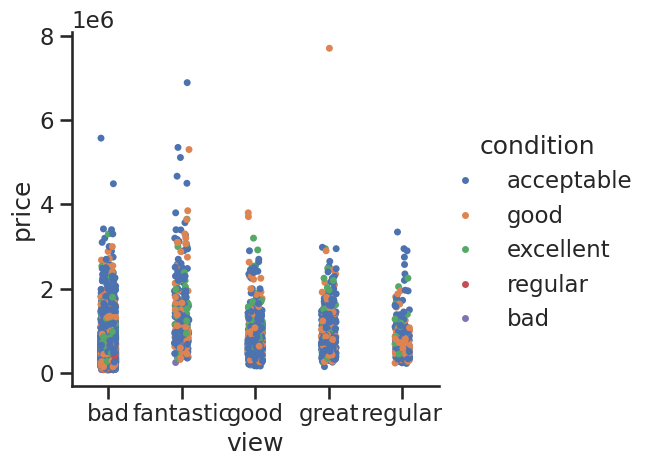

In [47]:
#Identificar los campos categoricos
sns.set_theme(style="ticks",context="talk")
sns.catplot(x="view",y="price",data=df,hue="condition")
plt.show()

In [ ]:
sns.catplot()

In [35]:
reemplazoCategorias={
    "view": {"bad":1,"regular":2,"good":3,"great":4,"fantastic":5},
    "condition": {"bad":1,"regular":2,"acceptable":3,"good":4,"excelent":5}
}

df = df.replace(reemplazoCategorias)
df["view"]

<class 'pandas.core.series.Series'>
RangeIndex: 18371 entries, 0 to 18370
Series name: view
Non-Null Count  Dtype 
--------------  ----- 
18371 non-null  object
dtypes: object(1)
memory usage: 143.6+ KB
